# 新型コロナ
元データ：https://corona.go.jp/dashboard/<br>
参考記事：<br>
statsmodelを用いた自己回帰分析（統計）<br>
https://qiita.com/DS27/items/1e998a58488e76bfcbdc<br>
RNN系のLSTMによる時系列データ予測(Deep Learning)<br>
https://qiita.com/sasayabaku/items/b7872a3b8acc7d6261bf<br>

In [3]:
import json
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

japanall = open('Covid19JapanAll.json', 'r')
japanall = json.load(japanall)
overseas = open('OccurrenceStatusOverseas.json', 'r')
overseas = json.load(overseas)
reductionrate = open('ReductionRate.json', 'r')
reductionrate = json.load(reductionrate)
japandeath = open('Covid19JapanNdeaths.json', 'r')
japandeath = json.load(japandeath)
daily = open('covid19DailySurvey.json', 'r')
daily = json.load(daily)

In [4]:
japanall_itemlist = japanall['itemList']
overseas_itemlist = overseas['itemList']
reductionrate_itemlist = reductionrate['itemList']
japandeath_itemlist = japandeath['itemList']

In [5]:
japanall_date = list()
japanall_name_jp = list()
japanall_npatients = list()

for item in japanall_itemlist:
    japanall_date.append(item['date'])
    japanall_name_jp.append(item['name_jp'])
    japanall_npatients.append(item['npatients'])
    
# 各都道府県毎の感染者数（日別、累計？）
japanall_df = pd.DataFrame(data=[japanall_date, japanall_name_jp, japanall_npatients]).T.rename(columns={0:'date', 1: 'name_jp', 2: 'patients'}).set_index('date')
japanall_df

,name_jp,patients
date,,
2021-08-23,北海道,53540
2021-08-23,青森県,3627
2021-08-23,岩手県,2701
2021-08-23,宮城県,13306
2021-08-23,秋田県,1413
...,...,...
2020-04-22,熊本県,41
2020-04-22,大分県,60
2020-04-22,宮崎県,17


In [233]:
# plt.figure(figsize=(20, 10))
# plt.plot(hokkaido.index, hokkaido['patients'])
# plt.xticks([xlabel_range[0], xlabel_range[-1]], fontsize=8)
# plt.yticks([min(ylabel_range), max(ylabel_range)], fontsize=8)
# plt.show()

In [8]:
japandeath_date = list()
japandeath_death = list()

for item in japandeath_itemlist:
    japandeath_date.append(item['date'])
    japandeath_death.append(item['ndeaths'])
    
# 国内の累計死者
japandeath_df = pd.DataFrame(data=[japandeath_date, japandeath_death]).T.rename(columns={0:'date', 1: 'ndeaths'}).sort_values('date', ascending=False).set_index('date')
japandeath_df

,ndeaths
date,
2021-08-24,15686
2021-08-23,15656
2021-08-22,15624
2021-08-21,15589
2021-08-20,15556
...,...
2020-04-25,348
2020-04-24,334
2020-04-23,317


In [232]:
# xlabel_range = japandeath_df.index
# ylabel_range = japandeath_df['ndeaths']

# plt.figure(figsize=(20, 10))
# plt.plot(japandeath_df.index, japandeath_df['ndeaths'])
# plt.xticks([xlabel_range[0], xlabel_range[-1]], fontsize=8)
# plt.yticks([min(ylabel_range), max(ylabel_range)], fontsize=8)
# plt.show()

In [10]:
daily[0].keys()

dict_keys(['facilityId', 'facilityName', 'zipCode', 'prefName', 'facilityAddr', 'facilityTel', 'latitude', 'longitude', 'submitDate', 'facilityType', 'ansType', 'localGovCode', 'cityName', 'facilityCode'])

In [11]:
daily[4]

{'facilityId': '10101075',
 'facilityName': '医療法人\u3000資生会\u3000創成東病院',
 'zipCode': '〒060-0053',
 'prefName': '北海道',
 'facilityAddr': '札幌市中央区南３条東３丁目１３番地',
 'facilityTel': '0112222117',
 'latitude': '43.0582096',
 'longitude': '141.3617177',
 'submitDate': '2021-08-24',
 'facilityType': '外来',
 'ansType': '制限',
 'localGovCode': '011002',
 'cityName': '札幌市',
 'facilityCode': '0110117785'}

In [12]:
daily_submitdate = list()
daily_prefName = list()
daily_facilityType = list()
daily_ansType = list()

for item in daily:
    daily_submitdate.append(item['submitDate'])
    daily_prefName.append(item['prefName'])
    daily_facilityType.append(item['facilityType'])
    daily_ansType.append(item['ansType'])
    
# 毎日更新される医療機関のステータス
daily_df = pd.DataFrame(data=[daily_submitdate, daily_prefName, daily_facilityType, daily_ansType]).T.rename(columns={0:'date', 1: 'prefName', 2: 'facilityType', 3: 'ansType'}).sort_values('date', ascending=False).set_index('date')
daily_df

,prefName,facilityType,ansType
date,,,
2021-08-24,北海道,入院,未回答
2021-08-24,奈良県,入院,通常
2021-08-24,奈良県,外来,通常
2021-08-24,奈良県,入院,通常
2021-08-24,奈良県,救急,通常
...,...,...,...
2021-08-24,東京都,救急,通常
2021-08-24,東京都,外来,通常
2021-08-24,東京都,入院,通常


In [13]:
overseas_date = list()
overseas_datename = list()
overseas_inferctednum = list()
overseas_deceasednum = list()

for item in overseas_itemlist:
    overseas_date.append(item['date'])
    overseas_datename.append(item['dataName'])
    overseas_inferctednum.append(item['infectedNum'])
    overseas_deceasednum.append(item['deceasedNum'])
    
# 日付毎の各国の感染状況
# infectNum: 累計感染者数
# deceasedNum: 累計死亡者数
overseas_df = pd.DataFrame(data=[overseas_date, overseas_datename, overseas_inferctednum, overseas_deceasednum]).T\
                .rename(columns={0:'date', 1: 'dataName', 2: 'infectNum', 3:'deceasedNum'}).set_index('date')
overseas_df

,dataName,infectNum,deceasedNum
date,,,
2021/08/24,中国,"94,687","4,636"
2021/08/24,香港,"12,063",212
2021/08/24,マカオ,63,0
2021/08/24,日本,"1,318,346","15,663"
2021/08/24,韓国,"239,287","2,228"
...,...,...,...
2020/04/20,南スーダン共和国,4,0
2020/04/20,サントメ・プリンシペ,4,0
2020/04/20,イエメン共和国,1,0


In [14]:
reduction_date = list()
reduction_datatype = list()
reduction_dataname = list()
reduction_comparisonpreday = list()
reduction_comparisonoredeclare = list()
reduction_comparisonprespread = list()

for item in reductionrate_itemlist:
    reduction_date.append(item['date'])
    reduction_datatype.append(item['dataType'])
    reduction_dataname.append(item['dataName'])
    reduction_comparisonpreday.append(item['comparisonPreDay'])
    reduction_comparisonoredeclare.append(item['comparisonPreDeclare'])
    reduction_comparisonprespread.append(item['comparisonPreSpread'])

# 全国の人口変動分析
# dataName: 全国各地の主要地域
# comparisionPreDay: 前日比の人口増減
# comparisonPreDeclare: 20200407発令の緊急事態宣言前との比較
# comparisonPreSpread: 感染拡大以前(20200107)との比較
reduction_df = pd.DataFrame(data=[reduction_date, reduction_datatype, reduction_dataname, reduction_comparisonpreday, reduction_comparisonoredeclare, reduction_comparisonprespread]).T\
                .rename(columns={0:'date', 1: 'dataType', 2: 'dataName', 3:'comparisonPreDay', 4:'comparisonPreDeclare', 5:'comparisonPreSpread'}).set_index('date')
reduction_df

,dataType,dataName,comparisonPreDay,comparisonPreDeclare,comparisonPreSpread
date,,,,,
2021/08/24,11,北海道札幌駅周辺,-4.6,-9.7,-16.9
2021/08/24,11,青森県青森駅周辺,0.7,-6.5,-16.0
2021/08/24,11,岩手県盛岡駅北周辺,3.7,3.5,-17.7
2021/08/24,11,宮城県仙台駅西周辺,1.8,10.9,-10.4
2021/08/24,11,秋田県秋田駅周辺,4.0,5.6,-10.4
...,...,...,...,...,...
2020/05/12,17,熊本県通町筋周辺,-6.5,-11.5,-30.7
2020/05/12,17,大分県大分駅付近周辺,0.2,-13.1,-34.1
2020/05/12,17,宮崎県新別府町周辺,8.2,-29.5,-44.0


In [16]:
# tmp = reduction_df.reset_index().drop(['dataType', 'dataName'], axis=1)
tmp = reduction_df.reset_index().drop('dataType', axis=1)
tmp2 = tmp[tmp['date'] < '2021/08/24']
tmp3 = tmp2.drop_duplicates().drop(['dataName', 'date'], axis=1).reset_index(drop=True)
tmp3

,comparisonPreDay,comparisonPreDeclare,comparisonPreSpread
0,29.1,-5.3,-12.9
1,28.1,-7.2,-16.6
2,28.9,-0.2,-20.6
3,33.1,8.9,-12.0
4,31.1,1.6,-13.8
...,...,...,...
21991,-6.5,-11.5,-30.7
21992,0.2,-13.1,-34.1
21993,8.2,-29.5,-44.0
21994,-0.3,-10.9,-22.9


In [17]:
japanall_tmp = japanall_df.reset_index()
japanall_tmp2 = japanall_tmp[japanall_tmp['date'] > '2020-05-11']
for i in range(len(japanall_tmp2)):
    japanall_tmp2['date'][i] = japanall_tmp2['date'][i].replace('-', '/')
japanall_tmp3 = japanall_tmp2[japanall_tmp2['date'] != '2020/06/04'].reset_index(drop=True)
japanall_tmp3

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


,date,name_jp,patients
0,2021/08/23,北海道,53540
1,2021/08/23,青森県,3627
2,2021/08/23,岩手県,2701
3,2021/08/23,宮城県,13306
4,2021/08/23,秋田県,1413
...,...,...,...
21991,2020/05/12,熊本県,48
21992,2020/05/12,大分県,60
21993,2020/05/12,宮崎県,17
21994,2020/05/12,鹿児島県,11


In [18]:
# ok
# for i in all_date:
#     print(len(japanall_tmp3[japanall_tmp3['date'] == i]))

# all_date = japanall_tmp3['date'].unique()
# tmp2_date = tmp2['date'].unique()

# print(len(all_date), len(tmp2_date))

# for i in all_date:
#     if i in tmp2_date:
#         pass
#     else:
#         print(i)

In [19]:
reduction_all = pd.concat([japanall_tmp3, tmp3], axis=1)
reduction_all

,date,name_jp,patients,comparisonPreDay,comparisonPreDeclare,comparisonPreSpread
0,2021/08/23,北海道,53540,29.1,-5.3,-12.9
1,2021/08/23,青森県,3627,28.1,-7.2,-16.6
2,2021/08/23,岩手県,2701,28.9,-0.2,-20.6
3,2021/08/23,宮城県,13306,33.1,8.9,-12.0
4,2021/08/23,秋田県,1413,31.1,1.6,-13.8
...,...,...,...,...,...,...
21991,2020/05/12,熊本県,48,-6.5,-11.5,-30.7
21992,2020/05/12,大分県,60,0.2,-13.1,-34.1
21993,2020/05/12,宮崎県,17,8.2,-29.5,-44.0
21994,2020/05/12,鹿児島県,11,-0.3,-10.9,-22.9


In [20]:
reduction_all[reduction_all['name_jp'] == '東京都']

,date,name_jp,patients,comparisonPreDay,comparisonPreDeclare,comparisonPreSpread
12,2021/08/23,東京都,314709,-2.5,9.9,-25.2
59,2021/08/22,東京都,312262,-6.9,12.6,-29.4
106,2021/08/21,東京都,307870,6.2,21.0,-24.1
153,2021/08/20,東京都,302796,3.2,14.0,-22.4
200,2021/08/19,東京都,297391,2.2,10.5,-24.8
...,...,...,...,...,...,...
21773,2020/05/16,東京都,5050,-25.1,-59.4,-74.5
21820,2020/05/15,東京都,5036,5.7,-45.7,-63.0
21867,2020/05/14,東京都,5027,2.2,-48.7,-65.0
21914,2020/05/13,東京都,4997,1.0,-49.8,-65.8


In [30]:
from sklearn import preprocessing
LE = preprocessing.LabelEncoder()

corr_data = reduction_all.set_index('date')
LE.fit(corr_data['name_jp'])
corr_data['labeled_name_jp'] = LE.transform(corr_data['name_jp'])
corr_data

,name_jp,patients,comparisonPreDay,comparisonPreDeclare,comparisonPreSpread,labeled_name_jp
date,,,,,,
2021/08/23,北海道,53540,29.1,-5.3,-12.9,4
2021/08/23,青森県,3627,28.1,-7.2,-16.6,41
2021/08/23,岩手県,2701,28.9,-0.2,-20.6,19
2021/08/23,宮城県,13306,33.1,8.9,-12.0,11
2021/08/23,秋田県,1413,31.1,1.6,-13.8,36
...,...,...,...,...,...,...
2020/05/12,熊本県,48,-6.5,-11.5,-30.7,30
2020/05/12,大分県,60,0.2,-13.1,-34.1,8
2020/05/12,宮崎県,17,8.2,-29.5,-44.0,12


In [32]:
corr_data[corr_data['labeled_name_jp'] == 26]

,name_jp,patients,comparisonPreDay,comparisonPreDeclare,comparisonPreSpread,labeled_name_jp
date,,,,,,
2021/08/23,東京都,314709,-2.5,9.9,-25.2,26
2021/08/22,東京都,312262,-6.9,12.6,-29.4,26
2021/08/21,東京都,307870,6.2,21.0,-24.1,26
2021/08/20,東京都,302796,3.2,14.0,-22.4,26
2021/08/19,東京都,297391,2.2,10.5,-24.8,26
...,...,...,...,...,...,...
2020/05/16,東京都,5050,-25.1,-59.4,-74.5,26
2020/05/15,東京都,5036,5.7,-45.7,-63.0,26
2020/05/14,東京都,5027,2.2,-48.7,-65.0,26


In [33]:
LE.classes_

array(['三重県', '京都府', '佐賀県', '兵庫県', '北海道', '千葉県', '和歌山県', '埼玉県', '大分県',
       '大阪府', '奈良県', '宮城県', '宮崎県', '富山県', '山口県', '山形県', '山梨県', '岐阜県',
       '岡山県', '岩手県', '島根県', '広島県', '徳島県', '愛媛県', '愛知県', '新潟県', '東京都',
       '栃木県', '沖縄県', '滋賀県', '熊本県', '石川県', '神奈川県', '福井県', '福岡県', '福島県',
       '秋田県', '群馬県', '茨城県', '長崎県', '長野県', '青森県', '静岡県', '香川県', '高知県',
       '鳥取県', '鹿児島県'], dtype=object)

In [34]:
import numpy as np
column = ['patients', 'comparisonPreDay', 'comparisonPreDeclare', 'comparisonPreSpread']
for i in column:
    if i == 'patients':
        corr_data[i] = corr_data[i].astype(np.int)
    else:
        corr_data[i] = corr_data[i].astype(np.float)


corr_data

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


,name_jp,patients,comparisonPreDay,comparisonPreDeclare,comparisonPreSpread,labeled_name_jp
date,,,,,,
2021/08/23,北海道,53540,29.1,-5.3,-12.9,4
2021/08/23,青森県,3627,28.1,-7.2,-16.6,41
2021/08/23,岩手県,2701,28.9,-0.2,-20.6,19
2021/08/23,宮城県,13306,33.1,8.9,-12.0,11
2021/08/23,秋田県,1413,31.1,1.6,-13.8,36
...,...,...,...,...,...,...
2020/05/12,熊本県,48,-6.5,-11.5,-30.7,30
2020/05/12,大分県,60,0.2,-13.1,-34.1,8
2020/05/12,宮崎県,17,8.2,-29.5,-44.0,12


In [35]:
# 神奈川県の累計感染者ミス修正
corr_data.loc[(corr_data['labeled_name_jp'] == 32) & (corr_data.index == '2020/09/23'), 'patients'] = 6452

In [36]:
corr_data[(corr_data['labeled_name_jp'] == 32) & (corr_data.index == '2020/09/23')]['patients']

date
2020/09/23    6452
Name: patients, dtype: int64

In [37]:
# 福島県の累計感染者ミス修正
corr_data.loc[(corr_data['labeled_name_jp'] == 35) & (corr_data.index == '2021/04/05'), 'patients'] = 2612

In [38]:
# 三重県の累計感染者ミス修正
corr_data.loc[(corr_data['labeled_name_jp'] == 0) & (corr_data.index == '2021/02/24'), 'patients'] = 2486

In [39]:
corr_data.corr()

,patients,comparisonPreDay,comparisonPreDeclare,comparisonPreSpread,labeled_name_jp
patients,1.000000,-0.013037,0.138747,-0.033332,-0.090344
comparisonPreDay,-0.013037,1.000000,0.280902,0.169810,-0.014726
comparisonPreDeclare,0.138747,0.280902,1.000000,0.572883,0.050145
comparisonPreSpread,-0.033332,0.169810,0.572883,1.000000,0.122021
labeled_name_jp,-0.090344,-0.014726,0.050145,0.122021,1.000000


In [40]:
corr_data.to_csv('made_data_08_27.csv')

In [159]:
import json
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


k = pd.read_csv('made_data_08_27.csv')
k

,date,name_jp,patients,comparisonPreDay,comparisonPreDeclare,comparisonPreSpread,labeled_name_jp
0,2021/08/23,北海道,53540,29.1,-5.3,-12.9,4
1,2021/08/23,青森県,3627,28.1,-7.2,-16.6,41
2,2021/08/23,岩手県,2701,28.9,-0.2,-20.6,19
3,2021/08/23,宮城県,13306,33.1,8.9,-12.0,11
4,2021/08/23,秋田県,1413,31.1,1.6,-13.8,36
...,...,...,...,...,...,...,...
21991,2020/05/12,熊本県,48,-6.5,-11.5,-30.7,30
21992,2020/05/12,大分県,60,0.2,-13.1,-34.1,8
21993,2020/05/12,宮崎県,17,8.2,-29.5,-44.0,12
21994,2020/05/12,鹿児島県,11,-0.3,-10.9,-22.9,46


In [148]:
# 各都道府県の日別新規感染者の棒グラフをプロット
def plot_daypatient(df):
    pref = df['labeled_name_jp'].unique()
    for i in pref:
        tmp = df[df['labeled_name_jp'] == i]
        tmp['day_patient'] = 0
        tmp['day_patient'] = tmp['patients'].shift(1) - tmp['patients']
        tmp = tmp.reset_index().sort_values('date', ascending=False)
        
        print('{}(Label No : {})の新規感染者数：'.format(df[df['labeled_name_jp']==i]['name_jp'].unique()[0], i))
        plt.figure(figsize=(20, 10))
        plt.bar(tmp['date'], tmp['day_patient'], width=0.4)
        plt.xticks(np.arange(0, len(tmp['date']), 5), rotation=285)
        plt.show()
        print('*'*147)

In [234]:
# plot_daypatient(k)

In [302]:
hokkaido = corr_data[corr_data['name_jp'] == 4]
hokkaido['day_patient'] = 0
hokkaido['day_patient'] = hokkaido['patients'].shift(1) - hokkaido['patients']
hokkaido

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,name_jp,patients,comparisonPreDay,comparisonPreDeclare,comparisonPreSpread,day_patient
date,,,,,,
2021/08/23,4,53540,29.1,-5.3,-12.9,NaN
2021/08/22,4,53120,-11.8,-26.6,-22.5,420.0
2021/08/21,4,52591,-14.5,-16.8,-12.1,529.0
2021/08/20,4,52012,4.5,-2.6,-10.4,579.0
2021/08/19,4,51489,-2.8,-6.8,-14.3,523.0
...,...,...,...,...,...,...
2020/05/16,4,999,-45.8,-72.4,-70.9,7.0
2020/05/15,4,989,4.4,-49.2,-53.2,10.0
2020/05/14,4,983,1.2,-51.3,-55.2,6.0


In [292]:
hokkaido[hokkaido.index==182]

,date,name_jp,patients,comparisonPreDay,comparisonPreDeclare,comparisonPreSpread,day_patient
182,2021/02/22,0,2480,43.0,-0.7,-17.0,6.0


In [289]:
hokkaido[hokkaido.index==181]

,date,name_jp,patients,comparisonPreDay,comparisonPreDeclare,comparisonPreSpread,day_patient
181,2021/02/23,0,2486,-21.9,-22.4,-22.5,100.0


In [288]:
hokkaido[hokkaido['day_patient'] < 0]

,date,name_jp,patients,comparisonPreDay,comparisonPreDeclare,comparisonPreSpread,day_patient
180,2021/02/24,0,2586,33.7,3.7,-13.4,-85.0


In [290]:
hokkaido[hokkaido.index==179]

,date,name_jp,patients,comparisonPreDay,comparisonPreDeclare,comparisonPreSpread,day_patient
179,2021/02/25,0,2501,6.6,10.5,-7.7,8.0


In [293]:
hokkaido[hokkaido.index==178]

,date,name_jp,patients,comparisonPreDay,comparisonPreDeclare,comparisonPreSpread,day_patient
178,2021/02/26,0,2509,11.0,22.7,2.5,12.0


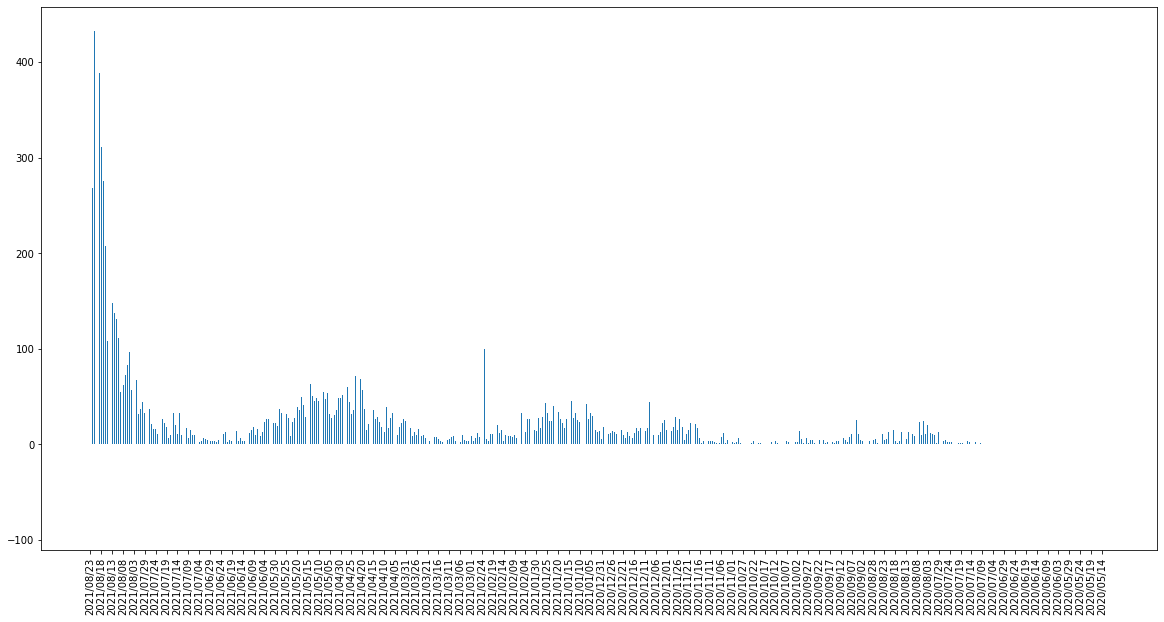

In [287]:
hokkaido = hokkaido.reset_index().sort_values('date', ascending=False)
plt.figure(figsize=(20, 10))
plt.bar(hokkaido['date'], hokkaido['day_patient'], width=0.4)
plt.xticks(np.arange(0, len(hokkaido['date']), 5), rotation=90)
plt.show()

In [52]:
k

,date,name_jp,patients,comparisonPreDay,comparisonPreDeclare,comparisonPreSpread,labeled_name_jp
0,2021/08/23,北海道,53540,29.1,-5.3,-12.9,4
1,2021/08/23,青森県,3627,28.1,-7.2,-16.6,41
2,2021/08/23,岩手県,2701,28.9,-0.2,-20.6,19
3,2021/08/23,宮城県,13306,33.1,8.9,-12.0,11
4,2021/08/23,秋田県,1413,31.1,1.6,-13.8,36
...,...,...,...,...,...,...,...
21991,2020/05/12,熊本県,48,-6.5,-11.5,-30.7,30
21992,2020/05/12,大分県,60,0.2,-13.1,-34.1,8
21993,2020/05/12,宮崎県,17,8.2,-29.5,-44.0,12
21994,2020/05/12,鹿児島県,11,-0.3,-10.9,-22.9,46


In [160]:
k['alart'] = 0
k

,date,name_jp,patients,comparisonPreDay,comparisonPreDeclare,comparisonPreSpread,labeled_name_jp,alart
0,2021/08/23,北海道,53540,29.1,-5.3,-12.9,4,0
1,2021/08/23,青森県,3627,28.1,-7.2,-16.6,41,0
2,2021/08/23,岩手県,2701,28.9,-0.2,-20.6,19,0
3,2021/08/23,宮城県,13306,33.1,8.9,-12.0,11,0
4,2021/08/23,秋田県,1413,31.1,1.6,-13.8,36,0
...,...,...,...,...,...,...,...,...
21991,2020/05/12,熊本県,48,-6.5,-11.5,-30.7,30,0
21992,2020/05/12,大分県,60,0.2,-13.1,-34.1,8,0
21993,2020/05/12,宮崎県,17,8.2,-29.5,-44.0,12,0
21994,2020/05/12,鹿児島県,11,-0.3,-10.9,-22.9,46,0


In [161]:
# 第一回緊急事態宣言発令地域（2020/05/06~2020/05/25）
first_emergency = ['東京都', '神奈川県', '埼玉県', '千葉県', '大阪府', '兵庫県', '福岡県', '北海道', '茨城県', '石川県', '岐阜県', '愛知県', '京都府']
for pref in first_emergency:
    k.loc[(k['name_jp'] == pref) & (k['date'] <= '2020/05/25') & (k['date'] >= '2020/05/12'), 'alart'] = '緊急事態宣言'
k

,date,name_jp,patients,comparisonPreDay,comparisonPreDeclare,comparisonPreSpread,labeled_name_jp,alart
0,2021/08/23,北海道,53540,29.1,-5.3,-12.9,4,0
1,2021/08/23,青森県,3627,28.1,-7.2,-16.6,41,0
2,2021/08/23,岩手県,2701,28.9,-0.2,-20.6,19,0
3,2021/08/23,宮城県,13306,33.1,8.9,-12.0,11,0
4,2021/08/23,秋田県,1413,31.1,1.6,-13.8,36,0
...,...,...,...,...,...,...,...,...
21991,2020/05/12,熊本県,48,-6.5,-11.5,-30.7,30,0
21992,2020/05/12,大分県,60,0.2,-13.1,-34.1,8,0
21993,2020/05/12,宮崎県,17,8.2,-29.5,-44.0,12,0
21994,2020/05/12,鹿児島県,11,-0.3,-10.9,-22.9,46,0


In [162]:
# 第2回緊急事態宣言発令地域（2021/01/08~2021/03/21）
second_emergency_f = ['東京都', '神奈川県', '埼玉県', '千葉県']
second_emergency_s = ['大阪府', '兵庫県', '京都府', '愛知県', '岐阜県', '福岡県', '栃木県']

for pref in second_emergency_f:
    k.loc[(k['name_jp'] == pref) & (k['date'] <= '2021/03/21') & (k['date'] >= '2021/01/08'), 'alart'] = '緊急事態宣言'
    
for pref in second_emergency_s:
    k.loc[(k['name_jp'] == pref) & (k['date'] <= '2021/03/21') & (k['date'] >= '2021/01/13'), 'alart'] = '緊急事態宣言'
k

,date,name_jp,patients,comparisonPreDay,comparisonPreDeclare,comparisonPreSpread,labeled_name_jp,alart
0,2021/08/23,北海道,53540,29.1,-5.3,-12.9,4,0
1,2021/08/23,青森県,3627,28.1,-7.2,-16.6,41,0
2,2021/08/23,岩手県,2701,28.9,-0.2,-20.6,19,0
3,2021/08/23,宮城県,13306,33.1,8.9,-12.0,11,0
4,2021/08/23,秋田県,1413,31.1,1.6,-13.8,36,0
...,...,...,...,...,...,...,...,...
21991,2020/05/12,熊本県,48,-6.5,-11.5,-30.7,30,0
21992,2020/05/12,大分県,60,0.2,-13.1,-34.1,8,0
21993,2020/05/12,宮崎県,17,8.2,-29.5,-44.0,12,0
21994,2020/05/12,鹿児島県,11,-0.3,-10.9,-22.9,46,0


In [163]:
# 第3回緊急事態宣言,蔓延防止等重点措置発令地域（2021/04/25~2021/06/20）
# https://www.broadcreation.com/blog/news/67977.html
# 2021/04/25~2021/04/30分
third_emergency_f = ['東京都', '大阪府', '京都府', '兵庫県']
third_manbo_f = ['神奈川県', '埼玉県', '千葉県', '愛知県', '愛媛県', '宮城県', '沖縄県']
# 2021/05/01~2021/06/20分
third_emergency_s = ['東京都', '愛知県', '大阪府', '京都府', '兵庫県', '岡山県', '広島県', '福岡県', '北海道', '沖縄県']
third_manbo_s = ['神奈川県', '埼玉県', '千葉県', '群馬県', '石川県', '岐阜県', '三重県', '愛媛県', '熊本県']
# ただし：2021/05/01~2021/05/31分
finished_manbo = ['宮城県']

for pref in third_emergency_f:
    k.loc[(k['name_jp'] == pref) & (k['date'] <= '2021/04/30') & (k['date'] >= '2021/04/25'), 'alart'] = '緊急事態宣言'
    
for pref in third_manbo_f:
    k.loc[(k['name_jp'] == pref) & (k['date'] <= '2021/04/30') & (k['date'] >= '2021/04/25'), 'alart'] = 'まん延防止等重点措置'
    
for pref in third_emergency_s:
    k.loc[(k['name_jp'] == pref) & (k['date'] <= '2021/06/20') & (k['date'] >= '2021/05/01'), 'alart'] = '緊急事態宣言'
    
for pref in third_manbo_f:
    k.loc[(k['name_jp'] == pref) & (k['date'] <= '2021/06/20') & (k['date'] >= '2021/05/01'), 'alart'] = 'まん延防止等重点措置'

for pref in finished_manbo:
    k.loc[(k['name_jp'] == pref) & (k['date'] <= '2021/05/31') & (k['date'] >= '2021/05/01'), 'alart'] = 'まん延防止等重点措置'
k

,date,name_jp,patients,comparisonPreDay,comparisonPreDeclare,comparisonPreSpread,labeled_name_jp,alart
0,2021/08/23,北海道,53540,29.1,-5.3,-12.9,4,0
1,2021/08/23,青森県,3627,28.1,-7.2,-16.6,41,0
2,2021/08/23,岩手県,2701,28.9,-0.2,-20.6,19,0
3,2021/08/23,宮城県,13306,33.1,8.9,-12.0,11,0
4,2021/08/23,秋田県,1413,31.1,1.6,-13.8,36,0
...,...,...,...,...,...,...,...,...
21991,2020/05/12,熊本県,48,-6.5,-11.5,-30.7,30,0
21992,2020/05/12,大分県,60,0.2,-13.1,-34.1,8,0
21993,2020/05/12,宮崎県,17,8.2,-29.5,-44.0,12,0
21994,2020/05/12,鹿児島県,11,-0.3,-10.9,-22.9,46,0


In [164]:
# 第4回緊急事態宣言,蔓延防止等重点措置発令地域（2021/06/21~2021/08/22）
# https://www.broadcreation.com/blog/news/67977.html
# 2021/06/21~2021/06/30分
forth_emergency_f = ['東京都', '大阪府', '京都府', '兵庫県', '愛知県', '岡山県', '広島県', '福岡県', '北海道', '沖縄県']
forth_manbo_f = ['神奈川県', '埼玉県', '千葉県', '群馬県', '石川県', '岐阜県', '三重県', '愛媛県', '熊本県']
# 2021/07/01~2021/07/31分
forth_emergency_s = ['東京都', '沖縄県']
forth_manbo_s = ['神奈川県', '埼玉県', '千葉県', '大阪府', '石川県', '岐阜県', '三重県', '愛媛県', '熊本県']
# 2021/07/01~2021/07/10分
finished_manbo_s = ['愛知県', '京都府', '兵庫県', '福岡県', '北海道']
# 2021/08/01~2021/08/19分
forth_emergency_t = ['東京都', '沖縄県', '神奈川県', '埼玉県', '千葉県', '大阪府']
forth_manbo_t = ['北海道', '京都府', '兵庫県', '福岡県', '石川県', '茨城県', '福島県', '栃木県', '群馬県', '静岡県', '愛知県', '滋賀県', '熊本県']
# 2021/08/20~2021/08/23分
forth_emergency_f = ['東京都', '神奈川県', '埼玉県', '千葉県', '大阪府', '沖縄県', '茨城県', '栃木県', '群馬県', '静岡県', '京都府', '兵庫県', '福岡県']
forth_manbo_f = ['北海道', '石川県', '福島県', '愛知県', '滋賀県', '熊本県', '宮城県', '山梨県', '富山県', '岐阜県', '三重県', '岡山県', '広島県', '香川県', '愛媛県', '鹿児島県']


for pref in forth_emergency_f:
    k.loc[(k['name_jp'] == pref) & (k['date'] <= '2021/06/30') & (k['date'] >= '2021/06/21'), 'alart'] = '緊急事態宣言'
    
for pref in forth_manbo_f:
    k.loc[(k['name_jp'] == pref) & (k['date'] <= '2021/06/30') & (k['date'] >= '2021/06/21'), 'alart'] = 'まん延防止等重点措置'
    
for pref in forth_emergency_s:
    k.loc[(k['name_jp'] == pref) & (k['date'] <= '2021/07/31') & (k['date'] >= '2021/07/01'), 'alart'] = '緊急事態宣言'
    
for pref in forth_manbo_s:
    k.loc[(k['name_jp'] == pref) & (k['date'] <= '2021/07/31') & (k['date'] >= '2021/07/01'), 'alart'] = 'まん延防止等重点措置'

for pref in finished_manbo_s:
    k.loc[(k['name_jp'] == pref) & (k['date'] <= '2021/07/10') & (k['date'] >= '2021/07/01'), 'alart'] = 'まん延防止等重点措置'
    
for pref in forth_emergency_t:
    k.loc[(k['name_jp'] == pref) & (k['date'] <= '2021/08/19') & (k['date'] >= '2021/08/01'), 'alart'] = '緊急事態宣言'
    
for pref in forth_manbo_t:
    k.loc[(k['name_jp'] == pref) & (k['date'] <= '2021/08/19') & (k['date'] >= '2021/08/01'), 'alart'] = 'まん延防止等重点措置'
    
for pref in forth_emergency_f:
    k.loc[(k['name_jp'] == pref) & (k['date'] <= '2021/08/23') & (k['date'] >= '2021/08/20'), 'alart'] = '緊急事態宣言'
    
for pref in forth_manbo_f:
    k.loc[(k['name_jp'] == pref) & (k['date'] <= '2021/08/23') & (k['date'] >= '2021/08/20'), 'alart'] = 'まん延防止等重点措置'
    
k.loc[k['alart'] == 0, 'alart'] = '宣言なし'
k

,date,name_jp,patients,comparisonPreDay,comparisonPreDeclare,comparisonPreSpread,labeled_name_jp,alart
0,2021/08/23,北海道,53540,29.1,-5.3,-12.9,4,まん延防止等重点措置
1,2021/08/23,青森県,3627,28.1,-7.2,-16.6,41,宣言なし
2,2021/08/23,岩手県,2701,28.9,-0.2,-20.6,19,宣言なし
3,2021/08/23,宮城県,13306,33.1,8.9,-12.0,11,まん延防止等重点措置
4,2021/08/23,秋田県,1413,31.1,1.6,-13.8,36,宣言なし
...,...,...,...,...,...,...,...,...
21991,2020/05/12,熊本県,48,-6.5,-11.5,-30.7,30,宣言なし
21992,2020/05/12,大分県,60,0.2,-13.1,-34.1,8,宣言なし
21993,2020/05/12,宮崎県,17,8.2,-29.5,-44.0,12,宣言なし
21994,2020/05/12,鹿児島県,11,-0.3,-10.9,-22.9,46,宣言なし


In [235]:
df = pd.read_excel('prefecture_code.xlsx', index_col=0).reset_index()
df['団体コード'] = df['団体コード'].astype(str)
df

,団体コード,都道府県名\n（漢字）,市区町村名\n（漢字）,都道府県名\n（ｶﾅ）,市区町村名\n（ｶﾅ）
0,10006,北海道,NaN,ﾎｯｶｲﾄﾞｳ,NaN
1,11002,北海道,札幌市,ﾎｯｶｲﾄﾞｳ,ｻｯﾎﾟﾛｼ
2,12025,北海道,函館市,ﾎｯｶｲﾄﾞｳ,ﾊｺﾀﾞﾃｼ
3,12033,北海道,小樽市,ﾎｯｶｲﾄﾞｳ,ｵﾀﾙｼ
4,12041,北海道,旭川市,ﾎｯｶｲﾄﾞｳ,ｱｻﾋｶﾜｼ
...,...,...,...,...,...
1789,473618,沖縄県,久米島町,ｵｷﾅﾜｹﾝ,ｸﾒｼﾞﾏﾁｮｳ
1790,473626,沖縄県,八重瀬町,ｵｷﾅﾜｹﾝ,ﾔｴｾﾁｮｳ
1791,473758,沖縄県,多良間村,ｵｷﾅﾜｹﾝ,ﾀﾗﾏｿﾝ
1792,473812,沖縄県,竹富町,ｵｷﾅﾜｹﾝ,ﾀｹﾄﾐﾁｮｳ


In [214]:
pref_name = k.name_jp.unique()
pref_code = dict()

for pref in pref_name:
    code = list(df.loc[df['都道府県名\n（漢字）'] == pref, '団体コード'])
    if len(code[0]) == 5:
        tmp = int(code[0][0])
    else:
        tmp = int(code[0][:2])
    pref_code[tmp] = pref
    
pref_code

{1: '北海道',
 2: '青森県',
 3: '岩手県',
 4: '宮城県',
 5: '秋田県',
 6: '山形県',
 7: '福島県',
 8: '茨城県',
 9: '栃木県',
 10: '群馬県',
 11: '埼玉県',
 12: '千葉県',
 13: '東京都',
 14: '神奈川県',
 15: '新潟県',
 16: '富山県',
 17: '石川県',
 18: '福井県',
 19: '山梨県',
 20: '長野県',
 21: '岐阜県',
 22: '静岡県',
 23: '愛知県',
 24: '三重県',
 25: '滋賀県',
 26: '京都府',
 27: '大阪府',
 28: '兵庫県',
 29: '奈良県',
 30: '和歌山県',
 31: '鳥取県',
 32: '島根県',
 33: '岡山県',
 34: '広島県',
 35: '山口県',
 36: '徳島県',
 37: '香川県',
 38: '愛媛県',
 39: '高知県',
 40: '福岡県',
 41: '佐賀県',
 42: '長崎県',
 43: '熊本県',
 44: '大分県',
 45: '宮崎県',
 46: '鹿児島県',
 47: '沖縄県'}

# ワクチン接種状況のデータ参照先
政府ポータルサイト：https://cio.go.jp/c19vaccine_dashboard<br>

In [236]:
vacctine = pd.read_csv('summary_by_date.csv', encoding='shift-jis')
vacctine

,date,count_first_or_mid_general,count_second_or_full_general
0,2021-04-12,4940,0
1,2021-04-13,4240,0
2,2021-04-14,5386,0
3,2021-04-15,9274,0
4,2021-04-16,11098,0
...,...,...,...
135,2021-08-25,447752,440891
136,2021-08-26,407435,396882
137,2021-08-27,374544,356834
138,2021-08-28,391648,390240


In [242]:
vacctine_json = pd.read_json('prefecture.ndjson', lines=True)
vacctine_json

,date,prefecture,gender,age,medical_worker,status,count
0,2021-04-12,1,F,-64,False,1,36
1,2021-04-12,1,F,65-,False,1,83
2,2021-04-12,1,M,-64,False,1,19
3,2021-04-12,1,M,65-,False,1,22
4,2021-04-12,1,U,UNK,False,1,2
...,...,...,...,...,...,...,...
60615,2021-08-29,47,M,-64,False,2,3089
60616,2021-08-29,47,M,65-,False,1,47
60617,2021-08-29,47,M,65-,False,2,107
60618,2021-08-29,47,U,UNK,False,1,5


In [243]:
for i in range(len(vacctine_json)):
    vacctine_json['date'][i] = str(vacctine_json['date'][i])[:10].replace('-', '/')
    vacctine_json.loc[i, 'prefecture'] = pref_code[vacctine_json.loc[i, 'prefecture']]
vacctine_json

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,date,prefecture,gender,age,medical_worker,status,count
0,2021/04/12,北海道,F,-64,False,1,36
1,2021/04/12,北海道,F,65-,False,1,83
2,2021/04/12,北海道,M,-64,False,1,19
3,2021/04/12,北海道,M,65-,False,1,22
4,2021/04/12,北海道,U,UNK,False,1,2
...,...,...,...,...,...,...,...
60615,2021/08/29,沖縄県,M,-64,False,2,3089
60616,2021/08/29,沖縄県,M,65-,False,1,47
60617,2021/08/29,沖縄県,M,65-,False,2,107
60618,2021/08/29,沖縄県,U,UNK,False,1,5


In [308]:
a = vacctine_json[vacctine_json['date'] == '2021/08/23'].groupby('prefecture').count().reset_index()
a

,prefecture,date,gender,age,medical_worker,status,count
0,三重県,10,10,10,10,10,10
1,京都府,10,10,10,10,10,10
2,佐賀県,10,10,10,10,10,10
3,兵庫県,12,12,12,12,12,12
4,北海道,11,11,11,11,11,11
5,千葉県,10,10,10,10,10,10
6,和歌山県,10,10,10,10,10,10
7,埼玉県,10,10,10,10,10,10
8,大分県,9,9,9,9,9,9
9,大阪府,10,10,10,10,10,10


In [275]:
b = a.loc[a['prefecture'] == '岩手県', 'count'].reset_index()
b

,index,count
0,18,2


In [297]:
k['count_vacctine'] = 0
k['total_vacctine'] = 0
k

,date,name_jp,patients,comparisonPreDay,comparisonPreDeclare,comparisonPreSpread,labeled_name_jp,alart,count_vacctine,total_vacctine
0,2021/08/23,北海道,53540,29.1,-5.3,-12.9,4,まん延防止等重点措置,0,0
1,2021/08/23,青森県,3627,28.1,-7.2,-16.6,41,宣言なし,0,0
2,2021/08/23,岩手県,2701,28.9,-0.2,-20.6,19,宣言なし,0,0
3,2021/08/23,宮城県,13306,33.1,8.9,-12.0,11,まん延防止等重点措置,0,0
4,2021/08/23,秋田県,1413,31.1,1.6,-13.8,36,宣言なし,0,0
...,...,...,...,...,...,...,...,...,...,...
21991,2020/05/12,熊本県,48,-6.5,-11.5,-30.7,30,宣言なし,0,0
21992,2020/05/12,大分県,60,0.2,-13.1,-34.1,8,宣言なし,0,0
21993,2020/05/12,宮崎県,17,8.2,-29.5,-44.0,12,宣言なし,0,0
21994,2020/05/12,鹿児島県,11,-0.3,-10.9,-22.9,46,宣言なし,0,0


In [300]:
day_of_vacctine = vacctine_json['date'].unique()
pref_list = vacctine_json['prefecture'].unique()
for day in day_of_vacctine:
    if day not in k.date.unique():
        pass
    else:
        tmp = vacctine_json[vacctine_json['date'] == day].groupby('prefecture').count().reset_index()
        for pref in tmp.prefecture.unique():
            tmp2 = tmp.loc[tmp['prefecture'] == pref, 'count'].reset_index()
            k.loc[(k['date'] == day) & (k['name_jp'] == pref), 'count_vacctine'] = tmp2.loc[0, 'count']
            k.loc[(k['date'] == day) & (k['name_jp'] == pref), 'total_vacctine'] = k[k['name_jp'] == pref]['count_vacctine'].sum()

k.fillna(0, inplace=True)

In [301]:
k.isnull().sum()

date                    0
name_jp                 0
patients                0
comparisonPreDay        0
comparisonPreDeclare    0
comparisonPreSpread     0
labeled_name_jp         0
alart                   0
count_vacctine          0
total_vacctine          0
dtype: int64

In [302]:
k

,date,name_jp,patients,comparisonPreDay,comparisonPreDeclare,comparisonPreSpread,labeled_name_jp,alart,count_vacctine,total_vacctine
0,2021/08/23,北海道,53540,29.1,-5.3,-12.9,4,まん延防止等重点措置,11,1270
1,2021/08/23,青森県,3627,28.1,-7.2,-16.6,41,宣言なし,10,1202
2,2021/08/23,岩手県,2701,28.9,-0.2,-20.6,19,宣言なし,10,1201
3,2021/08/23,宮城県,13306,33.1,8.9,-12.0,11,まん延防止等重点措置,10,1181
4,2021/08/23,秋田県,1413,31.1,1.6,-13.8,36,宣言なし,10,1165
...,...,...,...,...,...,...,...,...,...,...
21991,2020/05/12,熊本県,48,-6.5,-11.5,-30.7,30,宣言なし,0,0
21992,2020/05/12,大分県,60,0.2,-13.1,-34.1,8,宣言なし,0,0
21993,2020/05/12,宮崎県,17,8.2,-29.5,-44.0,12,宣言なし,0,0
21994,2020/05/12,鹿児島県,11,-0.3,-10.9,-22.9,46,宣言なし,0,0


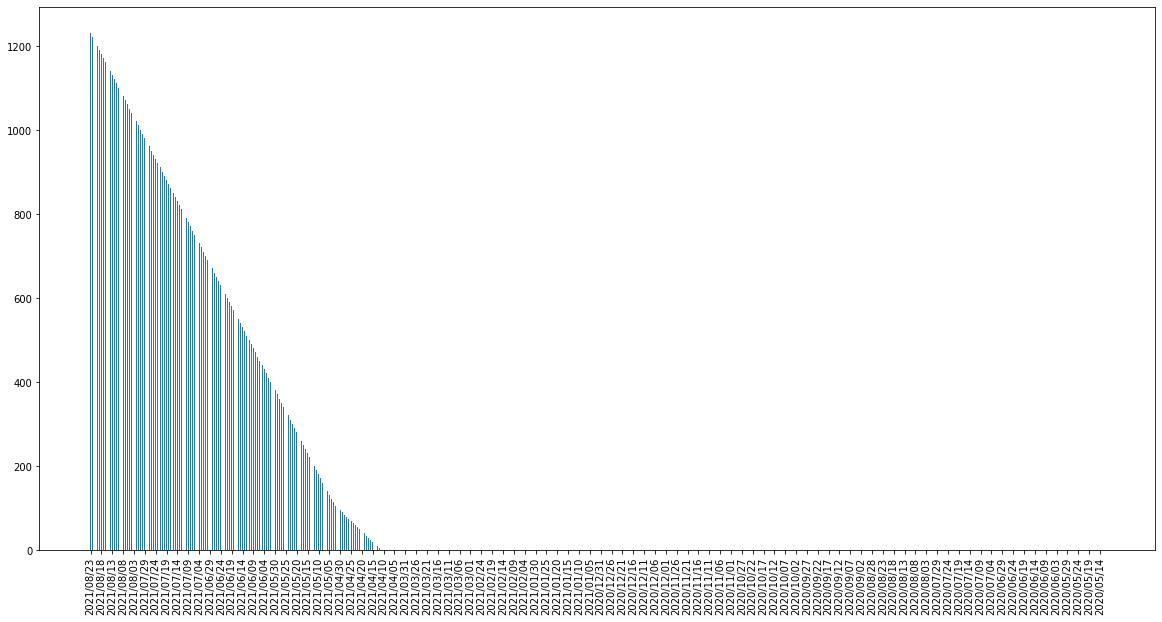

In [306]:
tmp = k[k['name_jp'] == '東京都']
tmp = tmp.reset_index().sort_values('date', ascending=False)
plt.figure(figsize=(20, 10))
plt.bar(tmp['date'], tmp['total_vacctine'], width=0.4)
plt.xticks(np.arange(0, len(tmp['date']), 5), rotation=90)
plt.show()

In [307]:
k[k['name_jp'] == '東京都']

,date,name_jp,patients,comparisonPreDay,comparisonPreDeclare,comparisonPreSpread,labeled_name_jp,alart,count_vacctine,total_vacctine
12,2021/08/23,東京都,314709,-2.5,9.9,-25.2,26,緊急事態宣言,10,1232
59,2021/08/22,東京都,312262,-6.9,12.6,-29.4,26,緊急事態宣言,11,1222
106,2021/08/21,東京都,307870,6.2,21.0,-24.1,26,緊急事態宣言,10,1211
153,2021/08/20,東京都,302796,3.2,14.0,-22.4,26,緊急事態宣言,10,1201
200,2021/08/19,東京都,297391,2.2,10.5,-24.8,26,緊急事態宣言,10,1191
...,...,...,...,...,...,...,...,...,...,...
21773,2020/05/16,東京都,5050,-25.1,-59.4,-74.5,26,緊急事態宣言,0,0
21820,2020/05/15,東京都,5036,5.7,-45.7,-63.0,26,緊急事態宣言,0,0
21867,2020/05/14,東京都,5027,2.2,-48.7,-65.0,26,緊急事態宣言,0,0
21914,2020/05/13,東京都,4997,1.0,-49.8,-65.8,26,緊急事態宣言,0,0


In [313]:
from sklearn import preprocessing
LE = preprocessing.LabelEncoder()

LE.fit(k['alart'])
k['labeled_alart'] = LE.transform(k['alart'])
k

,date,name_jp,patients,comparisonPreDay,comparisonPreDeclare,comparisonPreSpread,labeled_name_jp,alart,count_vacctine,total_vacctine,labeled_alart
0,2021/08/23,北海道,53540,29.1,-5.3,-12.9,4,まん延防止等重点措置,11,1270,0
1,2021/08/23,青森県,3627,28.1,-7.2,-16.6,41,宣言なし,10,1202,1
2,2021/08/23,岩手県,2701,28.9,-0.2,-20.6,19,宣言なし,10,1201,1
3,2021/08/23,宮城県,13306,33.1,8.9,-12.0,11,まん延防止等重点措置,10,1181,0
4,2021/08/23,秋田県,1413,31.1,1.6,-13.8,36,宣言なし,10,1165,1
...,...,...,...,...,...,...,...,...,...,...,...
21991,2020/05/12,熊本県,48,-6.5,-11.5,-30.7,30,宣言なし,0,0,1
21992,2020/05/12,大分県,60,0.2,-13.1,-34.1,8,宣言なし,0,0,1
21993,2020/05/12,宮崎県,17,8.2,-29.5,-44.0,12,宣言なし,0,0,1
21994,2020/05/12,鹿児島県,11,-0.3,-10.9,-22.9,46,宣言なし,0,0,1


In [314]:
k['day_patient'] = 0

In [323]:
tmp = k[k['name_jp'] == pref]
tmp['day_patient'] = 0
tmp['day_patient'] = tmp['patients'].shift(1) - tmp['patients']
tmp = tmp.reset_index(drop=True)
tmp

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,date,name_jp,patients,comparisonPreDay,comparisonPreDeclare,comparisonPreSpread,labeled_name_jp,alart,count_vacctine,total_vacctine,labeled_alart,day_patient
0,2021/08/23,沖縄県,37748,123.9,-9.8,-10.3,28,緊急事態宣言,10,1216,2,NaN
1,2021/08/22,沖縄県,37468,-14.2,-59.7,-20.8,28,緊急事態宣言,10,1206,2,280.0
2,2021/08/21,沖縄県,36882,-44.7,-53.0,-7.6,28,緊急事態宣言,10,1196,2,586.0
3,2021/08/20,沖縄県,36204,-9.3,-15.0,-15.5,28,緊急事態宣言,10,1186,2,678.0
4,2021/08/19,沖縄県,35461,-1.9,-6.2,-6.8,28,緊急事態宣言,10,1176,2,743.0
...,...,...,...,...,...,...,...,...,...,...,...,...
463,2020/05/16,沖縄県,142,-51.2,-55.1,-11.7,28,宣言なし,0,0,1,0.0
464,2020/05/15,沖縄県,142,11.6,-8.0,-8.6,28,宣言なし,0,0,1,0.0
465,2020/05/14,沖縄県,142,7.7,-17.5,-18.0,28,宣言なし,0,0,1,0.0
466,2020/05/13,沖縄県,142,3.6,-23.4,-23.9,28,宣言なし,0,0,1,0.0


In [334]:
pref_list = k['name_jp'].unique()
for pref in pref_list:
    tmp = k[k['name_jp'] == pref]
    tmp['day_patient'] = 0
    tmp['day_patient'] = tmp['patients'].shift(1) - tmp['patients']
    tmp = tmp.reset_index(drop=True)
#     print(tmp)
    for day in tmp.date:
        tmp2 = tmp.loc[tmp['date'] == day, 'day_patient'].reset_index()
#         print(tmp2.loc[:, 'day_patient'][0])
        k.loc[(k['name_jp'] == pref) & (k['date'] == day), 'day_patient'] = tmp2.loc[:, 'day_patient'][0]
        
k

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,date,name_jp,patients,comparisonPreDay,comparisonPreDeclare,comparisonPreSpread,labeled_name_jp,alart,count_vacctine,total_vacctine,labeled_alart,day_patient
0,2021/08/23,北海道,53540,29.1,-5.3,-12.9,4,まん延防止等重点措置,11,1270,0,NaN
1,2021/08/23,青森県,3627,28.1,-7.2,-16.6,41,宣言なし,10,1202,1,NaN
2,2021/08/23,岩手県,2701,28.9,-0.2,-20.6,19,宣言なし,10,1201,1,NaN
3,2021/08/23,宮城県,13306,33.1,8.9,-12.0,11,まん延防止等重点措置,10,1181,0,NaN
4,2021/08/23,秋田県,1413,31.1,1.6,-13.8,36,宣言なし,10,1165,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
21991,2020/05/12,熊本県,48,-6.5,-11.5,-30.7,30,宣言なし,0,0,1,0.0
21992,2020/05/12,大分県,60,0.2,-13.1,-34.1,8,宣言なし,0,0,1,0.0
21993,2020/05/12,宮崎県,17,8.2,-29.5,-44.0,12,宣言なし,0,0,1,0.0
21994,2020/05/12,鹿児島県,11,-0.3,-10.9,-22.9,46,宣言なし,0,0,1,0.0


In [344]:
c = k.dropna(how='any').reset_index(drop=True)
c

,date,name_jp,patients,comparisonPreDay,comparisonPreDeclare,comparisonPreSpread,labeled_name_jp,alart,count_vacctine,total_vacctine,labeled_alart,day_patient
0,2021/08/22,北海道,53120,-11.8,-26.6,-22.5,4,まん延防止等重点措置,11,1259,0,420.0
1,2021/08/22,青森県,3602,-6.1,-27.6,-26.2,41,宣言なし,10,1192,1,25.0
2,2021/08/22,岩手県,2698,-12.4,-22.6,-39.7,19,宣言なし,10,1191,1,3.0
3,2021/08/22,宮城県,13145,-8.2,-18.2,-28.7,11,まん延防止等重点措置,10,1171,0,161.0
4,2021/08/22,秋田県,1391,-16.9,-22.5,-28.0,36,宣言なし,10,1155,1,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...
21944,2020/05/12,熊本県,48,-6.5,-11.5,-30.7,30,宣言なし,0,0,1,0.0
21945,2020/05/12,大分県,60,0.2,-13.1,-34.1,8,宣言なし,0,0,1,0.0
21946,2020/05/12,宮崎県,17,8.2,-29.5,-44.0,12,宣言なし,0,0,1,0.0
21947,2020/05/12,鹿児島県,11,-0.3,-10.9,-22.9,46,宣言なし,0,0,1,0.0


In [345]:
c.to_csv('made_data_08_31.csv')

In [352]:
# 相関・多重共線性確認
# patients: リークしてるので削除
# count_vacctine: total_vacctineと役割がかぶっているので削除
# name_jp, alart:  ラベルエンコーディング処理済みなので削除
use_data.corr()

,patients,comparisonPreDay,comparisonPreDeclare,comparisonPreSpread,labeled_name_jp,count_vacctine,total_vacctine,labeled_alart,day_patient
patients,1.000000,-0.013552,0.139904,-0.032511,-0.090540,0.302333,0.292385,0.221560,0.753242
comparisonPreDay,-0.013552,1.000000,0.283237,0.171174,-0.014371,-0.002145,-0.014058,-0.002284,-0.012430
comparisonPreDeclare,0.139904,0.283237,1.000000,0.572940,0.050131,0.001031,0.017519,-0.038612,0.067008
comparisonPreSpread,-0.032511,0.171174,0.572940,1.000000,0.121858,-0.004242,0.015978,-0.148263,-0.054360
labeled_name_jp,-0.090540,-0.014371,0.050131,0.121858,1.000000,0.001681,0.001211,-0.061355,-0.059379
count_vacctine,0.302333,-0.002145,0.001031,-0.004242,0.001681,1.000000,0.861531,-0.163602,0.209454
total_vacctine,0.292385,-0.014058,0.017519,0.015978,0.001211,0.861531,1.000000,-0.186173,0.269170
labeled_alart,0.221560,-0.002284,-0.038612,-0.148263,-0.061355,-0.163602,-0.186173,1.000000,0.191184
day_patient,0.753242,-0.012430,0.067008,-0.054360,-0.059379,0.209454,0.269170,0.191184,1.000000


In [26]:
# 曜日情報を追加
import pandas as pd
import datetime as dt

data = pd.read_csv('made_data_08_31.csv', index_col=0)
data['day'] = 0
for i in range(len(data)):
    tmp = dt.datetime.strptime(data.loc[i, 'date'], "%Y/%m/%d")
    data.loc[i, 'day'] = tmp.strftime('%A')
data

,date,name_jp,patients,comparisonPreDay,comparisonPreDeclare,comparisonPreSpread,labeled_name_jp,alart,count_vacctine,total_vacctine,labeled_alart,day_patient,day
0,2021/08/22,北海道,53120,-11.8,-26.6,-22.5,4,まん延防止等重点措置,11,1259,0,420.0,Sunday
1,2021/08/22,青森県,3602,-6.1,-27.6,-26.2,41,宣言なし,10,1192,1,25.0,Sunday
2,2021/08/22,岩手県,2698,-12.4,-22.6,-39.7,19,宣言なし,10,1191,1,3.0,Sunday
3,2021/08/22,宮城県,13145,-8.2,-18.2,-28.7,11,まん延防止等重点措置,10,1171,0,161.0,Sunday
4,2021/08/22,秋田県,1391,-16.9,-22.5,-28.0,36,宣言なし,10,1155,1,22.0,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21944,2020/05/12,熊本県,48,-6.5,-11.5,-30.7,30,宣言なし,0,0,1,0.0,Tuesday
21945,2020/05/12,大分県,60,0.2,-13.1,-34.1,8,宣言なし,0,0,1,0.0,Tuesday
21946,2020/05/12,宮崎県,17,8.2,-29.5,-44.0,12,宣言なし,0,0,1,0.0,Tuesday
21947,2020/05/12,鹿児島県,11,-0.3,-10.9,-22.9,46,宣言なし,0,0,1,0.0,Tuesday


In [27]:
from sklearn import preprocessing
LE = preprocessing.LabelEncoder()

LE.fit(data['day'])
data['labeled_day'] = LE.transform(data['day'])
data

,date,name_jp,patients,comparisonPreDay,comparisonPreDeclare,comparisonPreSpread,labeled_name_jp,alart,count_vacctine,total_vacctine,labeled_alart,day_patient,day,labeled_day
0,2021/08/22,北海道,53120,-11.8,-26.6,-22.5,4,まん延防止等重点措置,11,1259,0,420.0,Sunday,3
1,2021/08/22,青森県,3602,-6.1,-27.6,-26.2,41,宣言なし,10,1192,1,25.0,Sunday,3
2,2021/08/22,岩手県,2698,-12.4,-22.6,-39.7,19,宣言なし,10,1191,1,3.0,Sunday,3
3,2021/08/22,宮城県,13145,-8.2,-18.2,-28.7,11,まん延防止等重点措置,10,1171,0,161.0,Sunday,3
4,2021/08/22,秋田県,1391,-16.9,-22.5,-28.0,36,宣言なし,10,1155,1,22.0,Sunday,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21944,2020/05/12,熊本県,48,-6.5,-11.5,-30.7,30,宣言なし,0,0,1,0.0,Tuesday,5
21945,2020/05/12,大分県,60,0.2,-13.1,-34.1,8,宣言なし,0,0,1,0.0,Tuesday,5
21946,2020/05/12,宮崎県,17,8.2,-29.5,-44.0,12,宣言なし,0,0,1,0.0,Tuesday,5
21947,2020/05/12,鹿児島県,11,-0.3,-10.9,-22.9,46,宣言なし,0,0,1,0.0,Tuesday,5


In [28]:
data.to_csv('made_data_09_03.csv')

# Long Short Term Memory(LSTM)による東京都における新型コロナウィルスの新規陽性者予測

In [4]:
# !pip install matplotlib

## 必要なライブラリ・モジュールのインポート、使用する元データ読み込み

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.layers import LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import metrics
from sklearn import metrics as skmet

use_data = pd.read_csv('made_data_08_31.csv', index_col=0)
use_data

,date,name_jp,patients,comparisonPreDay,comparisonPreDeclare,comparisonPreSpread,labeled_name_jp,alart,count_vacctine,total_vacctine,labeled_alart,day_patient
0,2021/08/22,北海道,53120,-11.8,-26.6,-22.5,4,まん延防止等重点措置,11,1259,0,420.0
1,2021/08/22,青森県,3602,-6.1,-27.6,-26.2,41,宣言なし,10,1192,1,25.0
2,2021/08/22,岩手県,2698,-12.4,-22.6,-39.7,19,宣言なし,10,1191,1,3.0
3,2021/08/22,宮城県,13145,-8.2,-18.2,-28.7,11,まん延防止等重点措置,10,1171,0,161.0
4,2021/08/22,秋田県,1391,-16.9,-22.5,-28.0,36,宣言なし,10,1155,1,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...
21944,2020/05/12,熊本県,48,-6.5,-11.5,-30.7,30,宣言なし,0,0,1,0.0
21945,2020/05/12,大分県,60,0.2,-13.1,-34.1,8,宣言なし,0,0,1,0.0
21946,2020/05/12,宮崎県,17,8.2,-29.5,-44.0,12,宣言なし,0,0,1,0.0
21947,2020/05/12,鹿児島県,11,-0.3,-10.9,-22.9,46,宣言なし,0,0,1,0.0


## 不要な項目の削除

In [39]:
pref_name_df = use_data[['name_jp', 'labeled_name_jp']].drop_duplicates()
alart_name_df = use_data[['alart', 'labeled_alart']].drop_duplicates().reset_index(drop=True)
# day_name_df = use_data[['day', 'labeled_day']].drop_duplicates().reset_index(drop=True)
X = use_data.drop(['name_jp', 'alart', 'patients', 'count_vacctine'], axis=1)
X

,date,comparisonPreDay,comparisonPreDeclare,comparisonPreSpread,labeled_name_jp,total_vacctine,labeled_alart,day_patient
0,2021/08/22,-11.8,-26.6,-22.5,4,1259,0,420.0
1,2021/08/22,-6.1,-27.6,-26.2,41,1192,1,25.0
2,2021/08/22,-12.4,-22.6,-39.7,19,1191,1,3.0
3,2021/08/22,-8.2,-18.2,-28.7,11,1171,0,161.0
4,2021/08/22,-16.9,-22.5,-28.0,36,1155,1,22.0
...,...,...,...,...,...,...,...,...
21944,2020/05/12,-6.5,-11.5,-30.7,30,0,1,0.0
21945,2020/05/12,0.2,-13.1,-34.1,8,0,1,0.0
21946,2020/05/12,8.2,-29.5,-44.0,12,0,1,0.0
21947,2020/05/12,-0.3,-10.9,-22.9,46,0,1,0.0


## データを学習用、テスト用、検証用に分割

In [40]:
# データ分割
X_train = X[X['date'] <= '2021/07/15'].reset_index(drop=True)
X_test = X[X['date'] >= '2021/08/01'].reset_index(drop=True)
X_val = X[(X['date'] > '2021/07/15') & (X['date'] < '2021/08/01')].reset_index(drop=True)

In [41]:
X_train

,date,comparisonPreDay,comparisonPreDeclare,comparisonPreSpread,labeled_name_jp,total_vacctine,labeled_alart,day_patient
0,2021/07/15,1.9,0.2,-7.8,4,856,1,73.0
1,2021/07/15,4.9,-10.3,-19.4,41,820,1,3.0
2,2021/07/15,-6.6,1.0,-19.6,19,817,1,9.0
3,2021/07/15,0.2,18.1,-4.6,11,791,1,48.0
4,2021/07/15,0.2,7.1,-9.1,36,783,1,9.0
...,...,...,...,...,...,...,...,...
20158,2020/05/12,-6.5,-11.5,-30.7,30,0,1,0.0
20159,2020/05/12,0.2,-13.1,-34.1,8,0,1,0.0
20160,2020/05/12,8.2,-29.5,-44.0,12,0,1,0.0
20161,2020/05/12,-0.3,-10.9,-22.9,46,0,1,0.0


## 元データから東京都のデータのみを抽出し、データ形式を変更

In [42]:
NAME_JP_NUM = 26

In [43]:
# 例えば東京都のみのデータ抽出をして予測をしてみる
tokyo_X_train = X_train[X_train['labeled_name_jp'] == NAME_JP_NUM].reset_index(drop=True)
tokyo_X_test = X_test[X_test['labeled_name_jp'] == NAME_JP_NUM].reset_index(drop=True)
tokyo_X_val = X_val[X_val['labeled_name_jp'] == NAME_JP_NUM].reset_index(drop=True)
tokyo_y_train = tokyo_X_train[['day_patient']].reset_index(drop=True)
tokyo_y_test = tokyo_X_test[['day_patient']].reset_index(drop=True)
tokyo_y_val = tokyo_X_val[['day_patient']].reset_index(drop=True)

toplotx = tokyo_X_test['date']

tokyo_X_train.drop(['date', 'labeled_name_jp', 'day_patient'], axis=1, inplace=True)
tokyo_X_test.drop(['date', 'labeled_name_jp', 'day_patient'], axis=1, inplace=True)
tokyo_X_val.drop(['date', 'labeled_name_jp', 'day_patient'], axis=1, inplace=True)

# np.arrayに変換
tokyo_X_train = np.array(tokyo_X_train).reshape(tokyo_X_train.shape[0], tokyo_X_train.shape[1], 1)
tokyo_X_test = np.array(tokyo_X_test).reshape(tokyo_X_test.shape[0], tokyo_X_test.shape[1], 1)
tokyo_X_val = np.array(tokyo_X_val).reshape(tokyo_X_val.shape[0], tokyo_X_val.shape[1], 1)
tokyo_y_train = np.array(tokyo_y_train).reshape(tokyo_y_train.shape[0], tokyo_y_train.shape[1], 1)
tokyo_y_test = np.array(tokyo_y_test).reshape(tokyo_y_test.shape[0], tokyo_y_test.shape[1], 1)
tokyo_y_val = np.array(tokyo_y_val).reshape(tokyo_y_val.shape[0], tokyo_y_val.shape[1], 1)
print(tokyo_X_train.shape, tokyo_X_test.shape, tokyo_X_val.shape)
print(tokyo_y_train.shape, tokyo_y_test.shape, tokyo_y_val.shape)

(429, 5, 1) (22, 5, 1) (16, 5, 1)
(429, 1, 1) (22, 1, 1) (16, 1, 1)


## LSTMの定義

In [202]:
# モデル構築
# keras公式ドキュメント：https://keras.io/ja/getting-started/sequential-model-guide/
# 参考記事：https://intellectual-curiosity.tokyo/2019/11/12/keras%e3%82%92%e7%94%a8%e3%81%84%e3%81%9flstm%e3%81%a7%e3%81%ae%e6%99%82%e7%b3%bb%e5%88%97%e3%83%87%e3%83%bc%e3%82%bf%e4%ba%88%e6%b8%ac/
# https://qiita.com/Kenta-Itasaka/items/4ab434299730af0fe7f0
loss = 'mean_squared_error'
val_loss = 'val_mean_squared_error'
model = Sequential()
model.add(LSTM(128, activation = 'relu', input_shape = (tokyo_X_train.shape[1], 1)))
model.add(Dropout(0.5))
model.add(Dense(1))
model.compile(loss= loss, optimizer = Adam(), metrics=[metrics.mse])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 128)               66560     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________


## 学習ステップ

In [203]:
%%time
# history = model.fit(tokyo_X_train, tokyo_y_train, epochs=100, steps_per_epoch=200, verbose=1, validation_data=(tokyo_X_val, tokyo_y_val))
loss_history = list()
val_loss_history = list()
EPOCHS = 50
epochs = 100
# steps_per_epoch = 140

callback = EarlyStopping(monitor='loss', patience=100)

print('TRAIN START')
for i in range(EPOCHS):
    history = model.fit(tokyo_X_train, tokyo_y_train, epochs=epochs, verbose=0, validation_data=(tokyo_X_val, tokyo_y_val), callbacks=[callback], batch_size=14)
    history_size = len(history.history['loss'])
    diff_loss = abs(history.history['val_loss'][history_size - 1] - history.history['loss'][history_size - 1])
    if ((i + 1) % 5 == 0) or (i + 1 == 1): 
        print('{} / {} : loss: {:.4f} | val_loss: {:.4f} | MAE: {:.4f} | val_MAE: {:.4f} | diff_loss: {:.4f}'.format(i + 1, EPOCHS, history.history['loss'][history_size - 1], history.history['val_loss'][history_size - 1],
        history.history[loss][history_size - 1], history.history[val_loss][history_size - 1], diff_loss))
    elif history_size != epochs:
        print('{} / {} : loss: {:.4f} | val_loss: {:.4f} | MAE: {:.4f} | val_MAE: {:.4f} | diff_loss: {:.4f}'.format(i + 1, EPOCHS, history.history['loss'][history_size - 1], history.history['val_loss'][history_size - 1],
        history.history[loss][history_size - 1], history.history[val_loss][history_size - 1], diff_loss))
        print('Early stopping is worked')
    else:
        pass
    
    for j in range(history_size):
        loss_history.append(history.history['loss'][j])
        val_loss_history.append(history.history['val_loss'][j])
        
print('TRAIN FINISHED')

TRAIN START
1 / 50 : loss: 90982.6016 | val_loss: 1799090.7500 | MAE: 90982.6016 | val_MAE: 1799090.7500 | diff_loss: 1708108.1484
5 / 50 : loss: 45849.7734 | val_loss: 1350465.3750 | MAE: 45849.7734 | val_MAE: 1350465.3750 | diff_loss: 1304615.6016
10 / 50 : loss: 18424.5020 | val_loss: 956022.1875 | MAE: 18424.5039 | val_MAE: 956022.2500 | diff_loss: 937597.6855
15 / 50 : loss: 14495.2461 | val_loss: 1394781.2500 | MAE: 14495.2461 | val_MAE: 1394781.2500 | diff_loss: 1380286.0039
20 / 50 : loss: 11311.8574 | val_loss: 1355793.8750 | MAE: 11311.8574 | val_MAE: 1355793.8750 | diff_loss: 1344482.0176
25 / 50 : loss: 14258.0850 | val_loss: 1348859.5000 | MAE: 14258.0850 | val_MAE: 1348859.5000 | diff_loss: 1334601.4150
30 / 50 : loss: 9658.0352 | val_loss: 1229618.7500 | MAE: 9658.0352 | val_MAE: 1229618.7500 | diff_loss: 1219960.7148
35 / 50 : loss: 18396.4746 | val_loss: 1207936.8750 | MAE: 18396.4746 | val_MAE: 1207936.8750 | diff_loss: 1189540.4004
40 / 50 : loss: 11369.0645 | val_lo

# ここからモデルセーブ＆AWSへデプロイ
参考記事：https://qiita.com/ground0state/items/ace1c7058b695b64116e<br>

In [206]:
# savedmodel形式
from tensorflow.keras import models
model.save('saved_model/my_model')

new_model = models.load_model('saved_model/my_model')

# アーキテクチャを確認
new_model.summary()

INFO:tensorflow:Assets written to: saved_model/my_model/assets


INFO:tensorflow:Assets written to: saved_model/my_model/assets


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 128)               66560     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________


In [44]:
# h5にsave
# model.save('covid_predict.h5')

from tensorflow.keras import models
new_model = models.load_model('covid_predict.h5')

# モデルのアーキテクチャを表示
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 128)               66560     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________


In [13]:
import boto3, time, json
sess    = boto3.Session()
sm      = sess.client('sagemaker')
region  = sess.region_name
account = boto3.client('sts').get_caller_identity().get('Account')

import sagemaker
role = sagemaker.get_execution_role()
sagemaker_session = sagemaker.Session(boto_session=sess)

In [64]:
# !tar cvfz covid_predict.h5.tar.gz covid_predict.h5
# !aws s3 cp covid_predict.h5.tar.gz s3://sagemaker-us-east-2-523358537305/models/
# !aws s3 cp made_data_08_31.csv s3://sagemaker-us-east-2-523358537305/data/
# !aws s3 cp X_test.csv s3://sagemaker-us-east-2-523358537305/data/

In [54]:
# トレーニングジョブ実行
import sagemaker
from sagemaker.model import Model
from sagemaker.predictor import RealTimePredictor
from sagemaker.tensorflow import TensorFlowModel
from sagemaker.estimator import Estimator

role = sagemaker.get_execution_role()
image = '523358537305.dkr.ecr.us-east-2.amazonaws.com/covid-prediction:latest'

# model_data = 's3://sagemaker-us-east-2-523358537305/models/covid_predict.h5.tar.gz'
# sm_model_name = 'covid-prediction'

estimator = Estimator(
                    image_uri = image,
                    role = role,
                    instance_type = "ml.p3.2xlarge",
                    instance_count=1)
estimator.fit({'yamazo-qiita-channel':'s3://sagemaker-us-east-2-523358537305/data/'})

INFO:sagemaker.image_uris:Defaulting to the only supported framework/algorithm version: latest.
INFO:sagemaker.image_uris:Ignoring unnecessary instance type: None.
INFO:sagemaker:Creating training-job with name: covid-prediction-2021-10-06-06-16-45-264


2021-10-06 06:16:45 Starting - Starting the training job...
2021-10-06 06:17:08 Starting - Launching requested ML instancesProfilerReport-1633501005: InProgress
......
2021-10-06 06:18:12 Starting - Preparing the instances for training.........
2021-10-06 06:19:31 Downloading - Downloading input data
2021-10-06 06:19:31 Training - Downloading the training image...............
2021-10-06 06:22:09 Training - Training image download completed. Training in progress..2021-10-06 06:22:13.771437: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-06 06:22:13.817915: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcusolver.so.11'; dlerror: libcusolver.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2021-10-06 06:22:13

In [56]:
# モデルデプロイ
endpoint_name = 'covid-endpoint-' + time.strftime("%Y-%m-%d-%H-%M-%S", time.gmtime())
my_predictor = estimator.deploy(instance_type='ml.m5.4xlarge', initial_instance_count=1, endpoint_name=endpoint_name)

INFO:sagemaker:Creating model with name: covid-prediction-2021-10-06-06-38-38-631
INFO:sagemaker:Creating endpoint with name covid-endpoint-2021-10-06-06-38-38


---------------!

# CSVデータからモデルの入力データに合う形で前処理→推論

参考：
入力データ形式→'col1_name,col2_name,col3_name,col4_name,col5_name\ncol1_value, col2_value, col3_value, col4_value, col5_value\n....'

In [70]:
X_test = pd.read_csv('X_test.csv', index_col=0)
NAME_JP_NUM = 26
X_test = X_test[X_test['labeled_name_jp'] == NAME_JP_NUM].reset_index(drop=True)
X_test.drop(['date', 'labeled_name_jp', 'day_patient'], axis=1, inplace=True)
X_test

,comparisonPreDay,comparisonPreDeclare,comparisonPreSpread,total_vacctine,labeled_alart
0,-6.9,12.6,-29.4,1222,2
1,6.2,21.0,-24.1,1211,2
2,3.2,14.0,-22.4,1201,2
3,2.2,10.5,-24.8,1191,2
4,3.1,8.0,-26.4,1181,2
5,-5.1,4.8,-28.7,1171,2
6,9.9,10.4,-24.8,1161,2
7,-10.4,0.4,-37.0,1151,2
8,0.8,12.1,-29.8,1141,2
9,1.7,11.1,-24.3,1131,2


In [78]:
text = list()
for i in X_test.columns:
    text.append(i)
text

['comparisonPreDay',
 'comparisonPreDeclare',
 'comparisonPreSpread',
 'total_vacctine',
 'labeled_alart']

In [91]:
value = list()
value2 = list()
for i in range(len(X_test)):
    value.append(X_test.iloc[i, :])
    for j in range(len(value[i])):
        if j == 0:
            value2.append('\n'+str(value[i][j]))
        else:
            value2.append(str(value[i][j]))

In [104]:
new_value = list()
for i in range(0, len(value2), 5):
    new_value.append(value2[i:i+5])
    
new_value

[['\n-6.9', '12.6', '-29.4', '1222.0', '2.0'],
 ['\n6.2', '21.0', '-24.1', '1211.0', '2.0'],
 ['\n3.2', '14.0', '-22.4', '1201.0', '2.0'],
 ['\n2.2', '10.5', '-24.8', '1191.0', '2.0'],
 ['\n3.1', '8.0', '-26.4', '1181.0', '2.0'],
 ['\n-5.1', '4.8', '-28.7', '1171.0', '2.0'],
 ['\n9.9', '10.4', '-24.8', '1161.0', '2.0'],
 ['\n-10.4', '0.4', '-37.0', '1151.0', '2.0'],
 ['\n0.8', '12.1', '-29.8', '1141.0', '2.0'],
 ['\n1.7', '11.1', '-24.3', '1131.0', '2.0'],
 ['\n-2.0', '9.3', '-25.6', '1121.0', '2.0'],
 ['\n0.0', '11.6', '-24.0', '1111.0', '2.0'],
 ['\n2.5', '11.5', '-24.0', '1101.0', '2.0'],
 ['\n3.6', '8.9', '-31.8', '1091.0', '2.0'],
 ['\n-12.5', '5.1', '-34.1', '1081.0', '2.0'],
 ['\n1.8', '20.2', '-24.7', '1071.0', '2.0'],
 ['\n0.4', '18.0', '-19.7', '1061.0', '2.0'],
 ['\n2.9', '17.5', '-20.0', '1051.0', '2.0'],
 ['\n-4.4', '14.1', '-22.3', '1041.0', '2.0'],
 ['\n-1.4', '19.4', '-18.7', '1031.0', '2.0'],
 ['\n-7.0', '21.1', '-17.5', '1021.0', '2.0'],
 ['\n-7.6', '30.2', '-18.4', '

In [107]:
','.join(new_value[0])

'\n-6.9,12.6,-29.4,1222.0,2.0'

In [81]:
column = ",".join(text)
column

'comparisonPreDay,comparisonPreDeclare,comparisonPreSpread,total_vacctine,labeled_alart'

In [109]:
# デプロイ後のモデルの推論確認
# data = 'id,url_legal,license,excerpt,log\n6.8, 12.5, -28.7, 1000.0, 2.0\n6.5, 10.5, -28.9, 1666.0, 2.0'
result = dict()
for data_num in range(len(new_value)):
    test = ",".join(new_value[data_num])
    data = column+test
    result[data_num] = my_predictor.predict(data=data)
    
result

{0: b'2655.0818\n',
 1: b'2458.0132\n',
 2: b'3224.0303\n',
 3: b'3409.748\n',
 4: b'3260.9497\n',
 5: b'3207.923\n',
 6: b'2458.6362\n',
 7: b'3206.148\n',
 8: b'3661.5352\n',
 9: b'3349.5786\n',
 10: b'3472.5862\n',
 11: b'3203.342\n',
 12: b'3124.062\n',
 13: b'3114.7844\n',
 14: b'2785.675\n',
 15: b'2722.8293\n',
 16: b'2650.1887\n',
 17: b'2532.3728\n',
 18: b'1919.2926\n',
 19: b'1857.2087\n',
 20: b'1300.5176\n',
 21: b'896.65137\n'}

In [63]:
import json
import boto3

endpoint_name = 'covid-endpoint-2021-10-06-06-38-38'

client = boto3.client('sagemaker-runtime')

data = 'id,url_legal,license,excerpt,log\n6.8, 12.5, -28.7, 1000.0, 2.0\n6.5, 10.5, -28.9, 1666.0, 2.0'
request_args = {
    'EndpointName': endpoint_name,
    'ContentType' : 'application/json',
    'Accept' : 'application/json',
    'Body' : data}

response = client.invoke_endpoint(**request_args)
response['Body'].read()

b'2495.1274\n4139.8623\n'

参考記事たち<br>
警告、エラーで参考にしろって言われた記事<br>
https://sagemaker.readthedocs.io/en/stable/v2.html<br>
sagemaker.tensorflowの公式ドキュメント<br>
https://sagemaker.readthedocs.io/en/stable/frameworks/tensorflow/using_tf.html<br>
訓練済みモデルデプロイの覚書<br>
https://www.magata.net/memo/index.php?%B7%B1%CE%FD%BA%D1%A4%DF%A5%E2%A5%C7%A5%EB%A4%F2SageMaker%A5%A8%A5%F3%A5%C9%A5%DD%A5%A4%A5%F3%A5%C8%A4%CB%A5%C7%A5%D7%A5%ED%A5%A4%A4%B9%A4%EB<br>
SageMakerでTensorFlow+Kerasによる独自モデルをトレーニングする方法<br>
https://www.inoue-kobo.com/aws/sagemaker-with-mymodel/index.html<br>
SageMakerを用いたオリジナルTensorFlowモデルの推論<br>
https://tech.unifa-e.com/entry/2021/07/20/090324<br>
カスタムモデルの為のコンテナイメージ作成<br>
https://dev.classmethod.jp/articles/sagemaker-container-image-custom/<br>

## 学習状況の確認

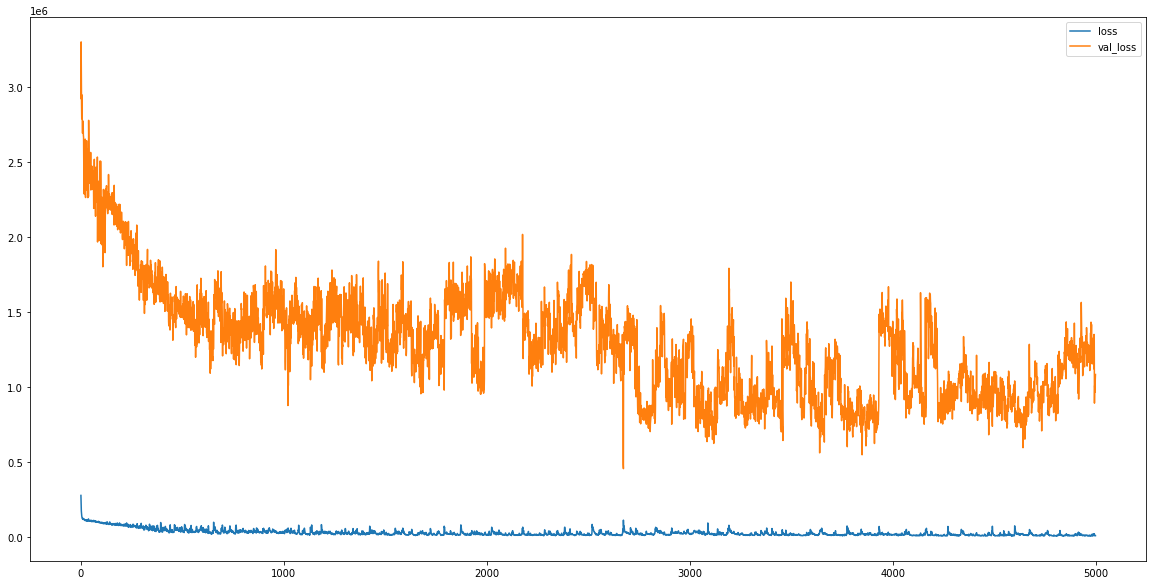

In [40]:
plt.figure(figsize=(20, 10))
plt.plot(loss_history, label='loss')
plt.plot(val_loss_history, label='val_loss')
plt.legend()
plt.show()

## 学習後のLSTMによるテストデータの推論フェイズ

In [41]:
Predict = model.predict(tokyo_X_test, verbose=1)

1/1 [==============================] - 0s 1ms/step


## モデルの精度確認

In [42]:
skmet.mean_squared_error(Predict, tokyo_y_test.reshape(tokyo_y_test.shape[0], 1))

1846356.8732121119

## 予測結果の可視化その1

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


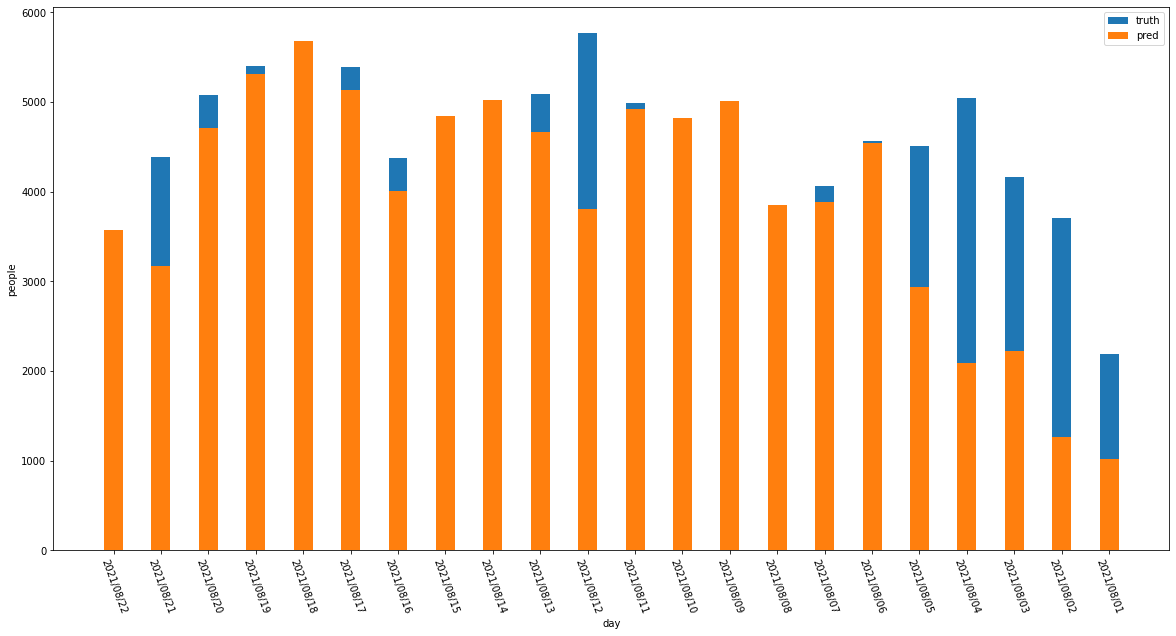

In [43]:
plt.figure(figsize=(20, 10))
plt.bar(toplotx, tokyo_y_test.reshape(-1), width=0.4, label='truth')
plt.bar(toplotx, Predict.reshape(-1), width=0.4, label='pred')
plt.xticks(rotation=290)
plt.xlabel('day')
plt.ylabel('people')
plt.legend()
plt.show()

## 予測結果の可視化その2

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


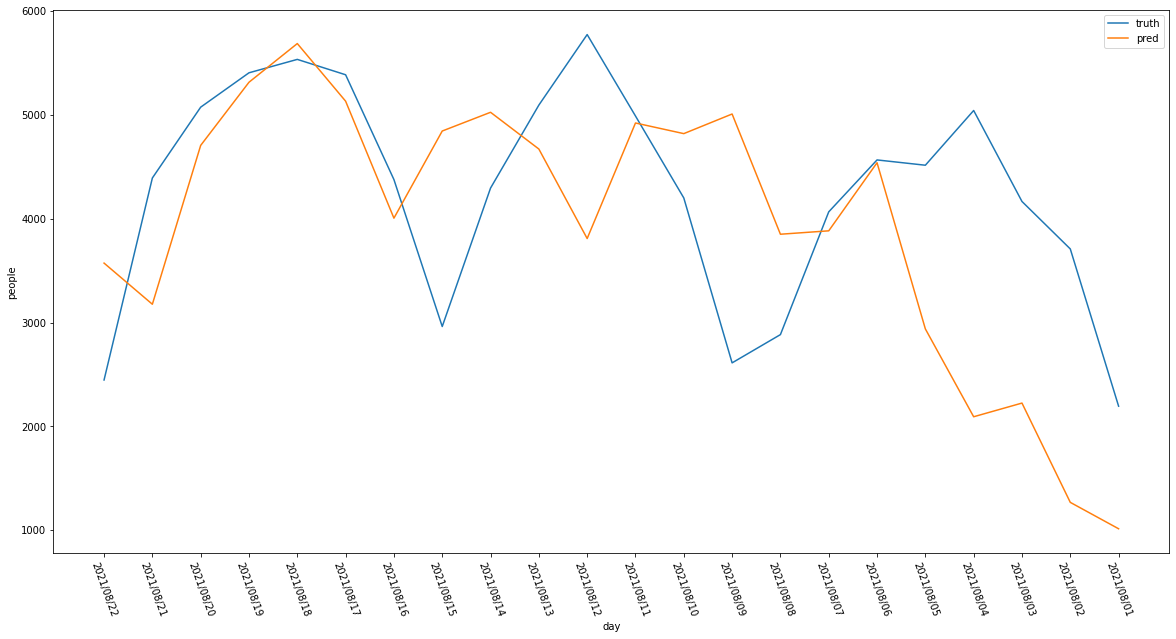

In [44]:
plt.figure(figsize=(20, 10))
plt.plot(toplotx, tokyo_y_test.reshape(-1), label='truth')
plt.plot(toplotx, Predict.reshape(-1), label='pred')
plt.xticks(rotation=290)
plt.xlabel('day')
plt.ylabel('people')
plt.legend()
plt.show()

In [3]:
!git clone https://github.com/aws-samples/aws-ml-jp.git

Cloning into 'aws-ml-jp'...
remote: Enumerating objects: 525, done.
remote: Counting objects: 100% (525/525), done.
remote: Compressing objects: 100% (410/410), done.
remote: Total 525 (delta 146), reused 424 (delta 80), pack-reused 0
Receiving objects: 100% (525/525), 24.79 MiB | 28.24 MiB/s, done.
Resolving deltas: 100% (146/146), done.
Checking out files: 100% (249/249), done.


In [2]:
!git clone https://github.com/huggingface/notebooks.git

Cloning into 'notebooks'...
remote: Enumerating objects: 2259, done.
remote: Counting objects: 100% (1606/1606), done.
remote: Compressing objects: 100% (862/862), done.
remote: Total 2259 (delta 1150), reused 1071 (delta 722), pack-reused 653
Receiving objects: 100% (2259/2259), 9.10 MiB | 8.68 MiB/s, done.
Resolving deltas: 100% (1527/1527), done.
Checking out files: 100% (224/224), done.
